# Bertopic Model Playground
Here we will extract previously trained model from the bertopic .ipynb and compare their results



## Model Download

Data will be downloaded from google drive folder

In [1]:
!pip install numpy~=1.20.0
!pip install bertopic==0.14.1

  Using cached bertopic-0.14.1-py2.py3-none-any.whl (120 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached sentencepiece-0.1.97-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached transformers-4.27.4-py3-none-any.whl (6.8 MB)
  Using cached huggingface_hub-0.13.4-py3-none-any.whl (200 kB)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached pynndescent-0.5.8-py3-none-any.whl
  Using cached filelock-3.11.0-py3-none-any.whl (10.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.1 MB/s eta 0:00:0000:0100:01


In [2]:
import csv
from bertopic import BERTopic

2023-04-12 03:53:40.888149: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
# Load data
data = []
import csv
with open(r'output_simple.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row[0])
del data[0] # Delete header

In [4]:
topic_model = BERTopic.load("cleaned_onlinemodel_1000_3_3_10decay") # Load model

In [5]:
topic_model.get_params() # Get model parameters

{'calculate_probabilities': False,
 'ctfidf_model': ClassTfidfTransformer(),
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x7f39f5bb5f10>,
 'hdbscan_model': MiniBatchKMeans(batch_size=16384, n_clusters=1000, random_state=0),
 'language': 'english',
 'low_memory': False,
 'min_topic_size': 10,
 'n_gram_range': (1, 1),
 'nr_topics': None,
 'representation_model': None,
 'seed_topic_list': None,
 'top_n_words': 10,
 'umap_model': IncrementalPCA(n_components=5),
 'vectorizer_model': OnlineCountVectorizer(decay=0.1),
 'verbose': True}

In [6]:
topic_model.get_topics()

{0: [('posted mobile device', 0.0003009597447156914),
  ('followers youtube views', 0.0002897543939010389),
  ('make money online', 0.00028326590640017295),
  ('im pretty sure', 0.0002751451399873671),
  ('black hat world', 0.0002740755220116875),
  ('tag pos1 typediv', 0.00026328360101264553),
  ('instagram followers youtube', 0.0002619815743370892),
  ('best article writing', 0.00026120766815441245),
  ('good luck thanks', 0.000255754766369772),
  ('article writing service', 0.00024991302977350933)],
 1: [('interested interested interested', 0.006002044135710788),
  ('interested im interested', 0.0014892366393363815),
  ('im interested interested', 0.001148066407024495),
  ('use coupon code', 0.0009903968316831773),
  ('samples discount code', 0.0009412544020391518),
  ('interested interested im', 0.0008290915549437975),
  ('interested thanks interested', 0.0008091894402357268),
  ('247 support skype', 0.0008028220806831281),
  ('skype skype sarkarkumar09', 0.000799001750273269),
  (

In [7]:
# Print headlines of the topics
hierarchical_topics = topic_model.hierarchical_topics(data)
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

100%|██████████| 279/279 [13:23<00:00,  2.88s/it]


.
├─million links indexed_15 million links_seofbytiggpinterest services related_gscraper proxy services_
│    ├─million links indexed_15 million links_cheapest fastest captcha_captchatronixcom cheapest fastest_in
│    │    ├─million links indexed_15 million links_gscraper proxy services_services related scrapebox_seofbytigg
│    │    │    ├─■──flat discount manual_backlinks 30 flat_comment backlinks 30_discount manual submission_related blog  ── Topic: 230
│    │    │    └─million links indexed_15 million links_services related scrapebox_gscraper proxy services_related sc
│    │    │         ├─million links indexed_15 million links_seofbytiggpinterest services related_related scrapebox gscrap
│    │    │         │    ├─■──million links indexed_15 million links_seofbytiggpinterest services related_services related scrapeb ── Topic: 236
│    │    │         │    └─■──million links indexed_15 million links_gscraper proxy services_related scrapebox gscraper_seofbytigg ── Topic: 192
│    │  

# The original tutorial is on bertopic_playground. The code here is for your own use

## Finding Bad Actors


### Get data (with authors)
- You can skip the next line if the data is already imported and unzipped

In [6]:
!gdown --fuzzy https://drive.google.com/file/d/1DuL0H8uZK-kSnpEEN-Lrn43OKqIMorWz/view?usp=sharing
!unzip output_simple_with_authors.csv.zip

/bin/bash: gdown: command not found
Archive:  output_simple_with_authors.csv.zip
replace output_simple_with_authors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [8]:
import pandas as pd
df = pd.read_csv(r'output_simple_with_authors.csv')

### Search for Specific keywords in Topics
- This will return an array with all topics that contain these words, and a second array with their corrosponding probabilities

In [9]:
topic_model.find_topics("selling accounts")

([102, 96, 63, 170, 14],
 [0.5449100680685621,
  0.5026678063548192,
  0.4837487674212948,
  0.47273755799383044,
  0.47022700051931965])

In [10]:
topic_model.find_topics("hacking")

([150, 260, 81, 90, 190],
 [0.39163799111419384,
  0.3865482296691098,
  0.3858214934322901,
  0.3787797092449543,
  0.37629833540816426])

In [11]:
topic_model.find_topics("selling scraping") 

([78, 14, 199, 90, 156],
 [0.48977044850642104,
  0.4774727403597159,
  0.47033719278763825,
  0.4674099494316735,
  0.4672602129928607])

In [12]:
topic_model.find_topics("I scam") 

([71, 25, 98, 72, 14],
 [0.5027482903212316,
  0.5022981463127243,
  0.47739517116560015,
  0.4657588875207384,
  0.46102083964824636])

In [24]:
topic_model.find_topics("selling proxies paypal") 

([124, 168, 224, 186, 136],
 [0.5579646561663552,
  0.545182816898448,
  0.5330018396380405,
  0.5283476027206399,
  0.5101890559381752])

In [25]:
topic_model.find_topics("order recieved paypal") 

([72, 11, 56, 2, 259],
 [0.5576500468091218,
  0.5096929785790622,
  0.505426790645368,
  0.47771337512506984,
  0.4463344549492174])

## Get Topic documents
- Lets get all the original documents, then select only the ones related to our selected topic

In [15]:
#Get original posts
T = topic_model.get_document_info(data)
docs_per_topics = T.groupby(["Topic"]).apply(lambda x: x.index).to_dict()

In [26]:
# Get all posts for a specific topic number
single_topics_data = []
for index in docs_per_topics[124]: # Choose topic number here
    single_topics_data.append(data[index])

In [28]:
# Print all of the posts related to a topic
post_counter = 0
for post in single_topics_data[:10]: # Prints documents in selected topic
    print(str(post_counter)+": "+post+"\n")
    post_counter+=1
    if post_counter>500: # cut it short because there may be too many docs to display at once
        break

0: Well written post. Basically everything people need to know but they are just lazy to take action. But you just did                             

1: For me, a 1000-word article used to take 2 to 3 hours (sometimes more) to write. This excludes checking for plagiarism and making sure that the article does not look like a rushed high school essay. Some of us are just not meant to write, I think. LOL!

2: lol I have written 15 articles in 1 month and I think it's still not enough. 10 articles in 6 months?

3: Anyone else would like to share their opinion ?

4: It is not a problem, but think of it from a readers point of view. Its a lot more engaging, pictures also help clarify the main pointt of the article usually and overall its more pleasant to theeye

5: Wow, that is a lot.    And here is me, whining after writing 5k words article.                            

6: Wow, you completed a university degree for one article, lol                            

7: How many blog posts is many 

## Get an authors name from his post

In [29]:
search_string = single_topics_data[8] # Choose a post to search by
print(search_string) # Double check if this is the posts you were interested in

It's not so much about what topic you write about, it's about HOW MANY people read your post.


In [30]:
print(df.loc[df["text"] == search_string,["author"]]) # Search the posts with authors dataframe for this particular posts

         author
46414  GoodBook


# Get all of an authors posts

In [31]:
author_name = "GoodBook" # Get from previous cell
posts = df.loc[df['author'] == author_name, "text"] #select all posts with the above authors name

# Set the maximum column width to display (unlimited)
pd.options.display.max_colwidth = None

In [32]:
posts.shape # Number of posts

(216,)

Read his other posts

In [33]:
posts.head(30) 

45294                                                                                                                                                                                                                          That's an intelligent move by Google if it's true.
46414                                                                                                                                                                               It's not so much about what topic you write about, it's about HOW MANY people read your post.
256983                                                                                                                                                                                              Check this out - wwwblackhatworld.comseoget-2-40-terabytes-of-courses.1167122
260683                                                                                                                                                                            

In [34]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(width = 2000, height = 2000,background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Using cached wordcloud-1.8.2.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (458 kB)


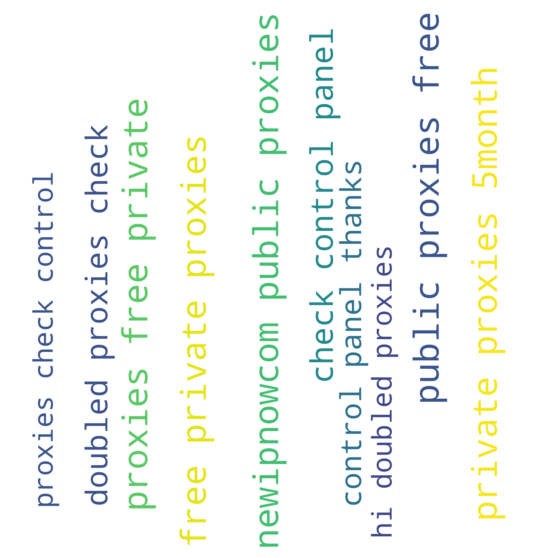

In [35]:
create_wordcloud(topic_model, topic=124)

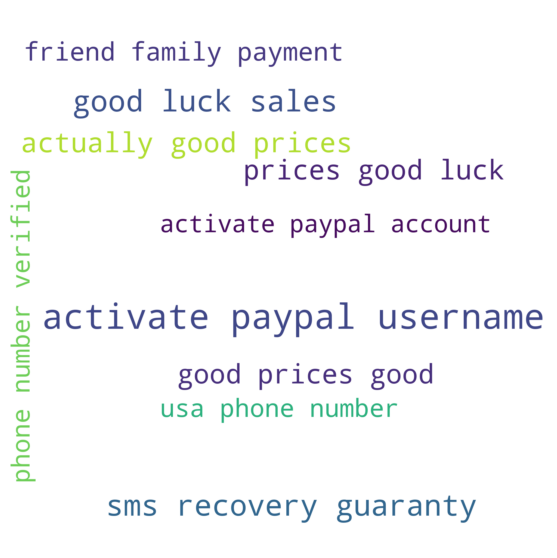

In [36]:
create_wordcloud(topic_model, topic=72)

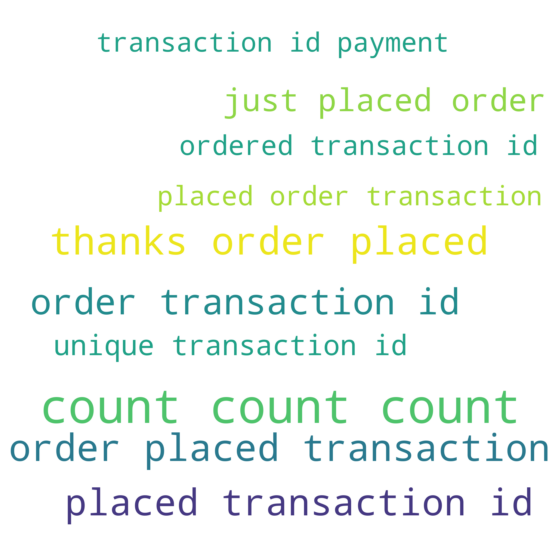

In [37]:
create_wordcloud(topic_model, topic=11)

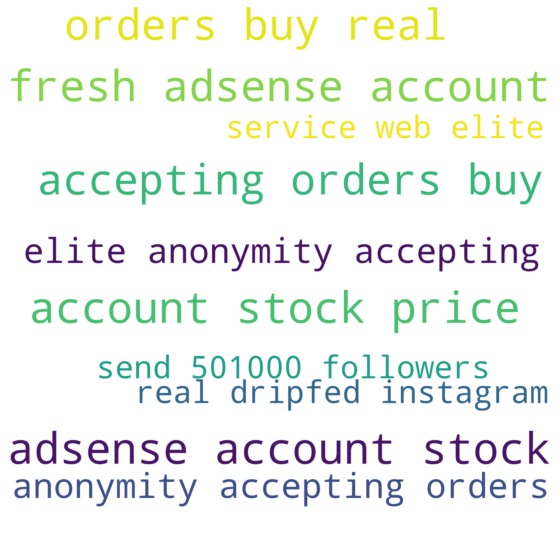

In [38]:
create_wordcloud(topic_model, topic=102)

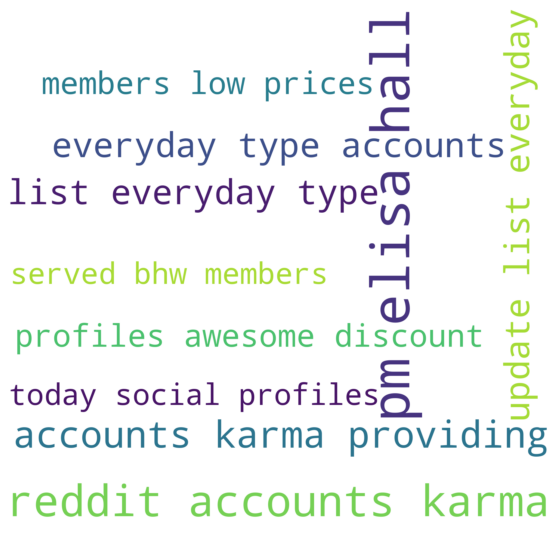

In [39]:
create_wordcloud(topic_model, topic=96)

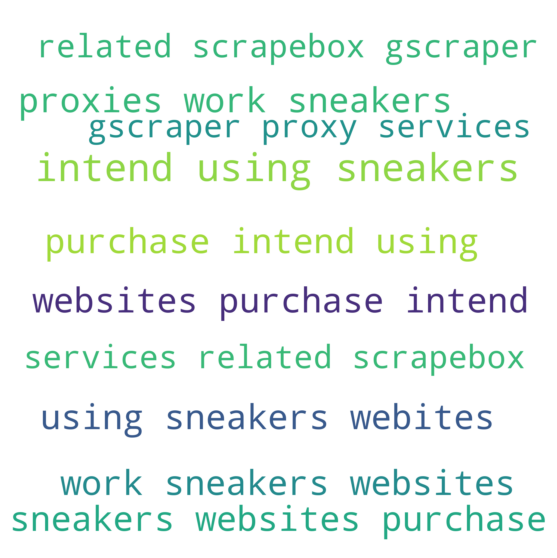

In [40]:
create_wordcloud(topic_model, topic=78)

In [ ]:
create_wordcloud(topic_model, topic=1)